In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# data from https://doi.org/10.17605/OSF.IO/JHPX8
story_path = "../Literature/MomenianEtAl2024/Language Model/story.csv"
eeg_path = "../Literature/MomenianEtAl2024/Bayesian Analysis/Data.csv"

story_df = pd.read_csv(story_path)
eeg_df = pd.read_csv(eeg_path)

# we only want monolingual data
eeg_df = eeg_df[eeg_df.Group == "Monolingual"]

# append the Alice in Wonderland words 
eeg_df.insert(1, "RealWord", list(story_df.word) * (len(eeg_df) // len(story_df)))

# Append the surprisal data calculated beforehand
surp_df = pd.read_csv('AliceWonderlandSurprisal.csv')
eeg_df.insert(1, "Bolbol", list(surp_df.Bolbol) * (len(eeg_df) // len(surp_df)))
eeg_df.insert(1, "Hoosh", list(surp_df.Hoosh) * (len(eeg_df) // len(surp_df)))
eeg_df.insert(1, "FaBert", list(surp_df.FaBert) * (len(eeg_df) // len(surp_df)))
eeg_df["FaBert_PW"] = [0] + list(eeg_df["FaBert"])[:-1]
eeg_df["Hoosh_PW"] = [0] + list(eeg_df["Hoosh"])[:-1]
eeg_df["Bolbol_PW"] = [0] + list(eeg_df["Bolbol"])[:-1]

# Amplitude data from the eeg channels
eeg_df["Amplitude"] = eeg_df[["CZ", "C3", "C4", "PZ", "P3", "P4"]].mean(axis=1) - eeg_df[["b_CZ", "b_CZ", "b_CZ", "b_CZ", "b_CZ", "b_CZ"]].mean(axis=1)

18


<Figure size 1000x600 with 0 Axes>

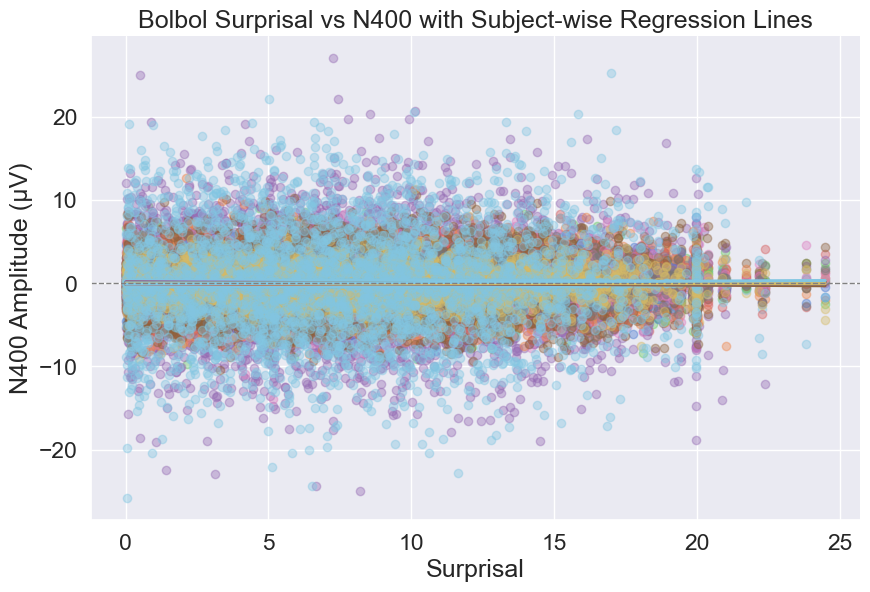

In [ ]:
sns.set(font_scale=1.5)
plt.figure(figsize=(10, 6))
g = sns.lmplot(data=eeg_df, x='Bolbol_PW', y='Amplitude', hue='Subject', 
           ci=None, aspect=1.5, height=6, palette='muted', scatter_kws={'alpha': 0.4})
plt.title('Bolbol Surprisal vs N400 with Subject-wise Regression Lines')
plt.xlabel('Surprisal')
plt.ylabel('N400 Amplitude (µV)')
g._legend.remove()
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.show()

<Figure size 1000x600 with 0 Axes>

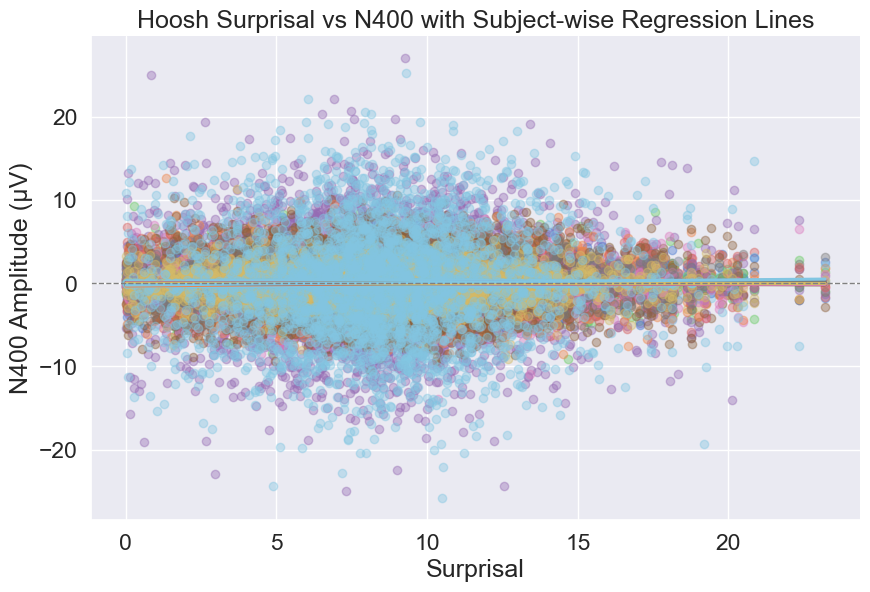

In [79]:
plt.figure(figsize=(10, 6))
g = sns.lmplot(data=eeg_df, x='Hoosh_PW', y='Amplitude', hue='Subject', 
           ci=None, aspect=1.5, height=6, palette='muted', scatter_kws={'alpha': 0.4})
plt.title('Hoosh Surprisal vs N400 with Subject-wise Regression Lines')
plt.xlabel('Surprisal')
plt.ylabel('N400 Amplitude (µV)')
g._legend.remove()
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.show()


<Figure size 1000x600 with 0 Axes>

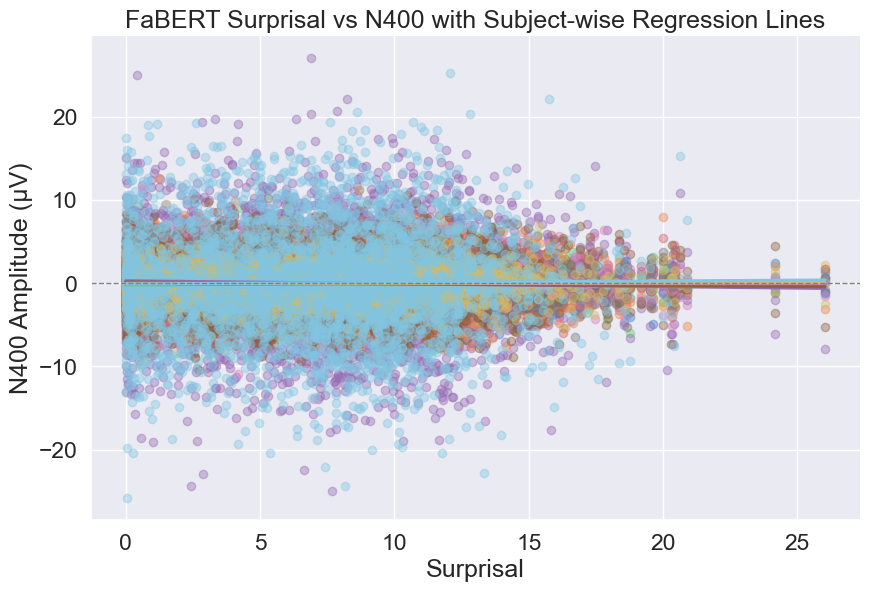

In [82]:
plt.figure(figsize=(10, 6))
g = sns.lmplot(data=eeg_df, x='FaBert_PW', y='Amplitude', hue='Subject', 
           ci=None, aspect=1.5, height=6, palette='muted', scatter_kws={'alpha': 0.4})
plt.title('FaBERT Surprisal vs N400 with Subject-wise Regression Lines')
plt.xlabel('Surprisal')
g._legend.remove()
plt.ylabel('N400 Amplitude (µV)')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.show()
